In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [20]:
df = pd.read_csv('PX_Ret_RV.csv', parse_dates=["Date"], date_format="%d-%m-%y")

In [30]:
#conveting to datetime object
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


C:\Users\Kateřina\AppData\Local\Temp\ipykernel_32648\1747074881.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [31]:
df.head()

,Date,Price,Ret,RV
0,2008-03-01,-0.009109,0.000041,1792.2
1,2008-04-01,-0.016370,0.000090,1763.1
2,2008-07-01,-0.022136,0.000114,1724.5
3,2008-08-01,0.004917,0.000082,1733.0
4,2008-09-01,-0.025836,0.000147,1688.8


In [32]:
df['Year'] = df['Date'].dt.year

In [33]:
df.head()

,Date,Price,Ret,RV,Year
0,2008-03-01,-0.009109,0.000041,1792.2,2008
1,2008-04-01,-0.016370,0.000090,1763.1,2008
2,2008-07-01,-0.022136,0.000114,1724.5,2008
3,2008-08-01,0.004917,0.000082,1733.0,2008
4,2008-09-01,-0.025836,0.000147,1688.8,2008


In [34]:
df.iloc[-2:-1]

,Date,Price,Ret,RV,Year
1347,2013-05-30,-0.004377,0.000026,975.61,2013


1. Is there a company that has no difference between the Price and RV columns?
What does it mean from the financial point of view for the stock (you can get bonus
partial points)?


In [24]:
len(df[df[' Price'] == df[' RV']])

0

2. What is the highest and lowest price (Adj Close) each company recorded?

In [25]:
minprice = df[' Price'].min()
maxprice = df[' Price'].max()
print(minprice, maxprice)

-0.163042618 0.120887546


3. (1pt task) Calculate logarithmic returns from Adj Close. For each company report on
its, min, man, mean, median of the return distribution.


In [38]:
len(df[df[' Price'] == 0])

5

In [36]:
df['Log Return'] = np.log(df[' Price'] / df[' Price'].shift(1))

C:\Users\Kateřina\AppData\Roaming\Python\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Kateřina\AppData\Roaming\Python\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [51]:
df = df.dropna()

In [47]:
#all type of years
#years = df['Year'].drop_duplicates().tolist()
#years = pd.Series(years)
#print(years)

In [56]:
df.groupby('Year')[['Log Return']].max()

,Log Return
Year,
2008,inf
2009,inf
2010,2.825073
2011,3.826691
2012,inf
2013,6.687291


4. When did each company record the highest gain and highest loss for the day?
(logarithmic loss). Hint: idxmax

In [ ]:
df['Date'].idxmax() #returns the index of the highest loss

np.int64(1294)

5. What is the average calendar weekly volume for each company? Hint: check how to
resample pandas DF

In [58]:
df.set_index('Date', inplace=True)

In [59]:
df

,Price,Ret,RV,Year,Log Return
Date,,,,,
2008-04-01,-0.016370,0.000090,1763.10,2008,0.586189
2008-07-01,-0.022136,0.000114,1724.50,2008,0.301758
2008-10-01,-0.025609,0.000300,1646.10,2008,-0.008803
2008-01-15,-0.018769,0.000160,1620.40,2008,1.594987
2008-01-16,-0.031088,0.000264,1570.80,2008,0.504631
...,...,...,...,...,...
2013-05-22,0.004945,0.000044,989.24,2013,1.366930
2013-05-24,-0.001272,0.000034,974.14,2013,-2.406197
2013-05-28,0.004828,0.000030,986.20,2013,-0.437249


In [ ]:
# 1. Convert the 'Date' column to datetime if it's not already
#df['Date'] = pd.to_datetime(df['Date'])

# 2. Set 'Date' as the index (if not already)
#df.set_index('Date', inplace=True)

# 3. Resample the data by week, and calculate the average volume for each company
# 'W' stands for weekly frequency
#weekly_avg_volume = df.groupby('Company').resample('W').mean()['Volume']

# 4. If you only want the weekly average volume (no other columns), you can do:
#weekly_avg_volume = df.groupby('Company').resample('W')['Volume'].mean()

# Display the result
#print(weekly_avg_volume)

In [ ]:
weekly_avg = df.resample('W').mean() #mean of everything
# weekly_avg_volume = df['Price'].resample('W').mean()

In [62]:
pd.DataFrame(weekly_avg)

,Price,Ret,RV,Year,Log Return
Date,,,,,
2008-01-06,0.027051,0.000038,1562.500000,2008.0,0.920397
2008-01-13,-0.010284,0.000061,1451.100000,2008.0,0.649013
2008-01-20,-0.018598,0.000232,1584.233333,2008.0,0.148065
2008-01-27,-0.016112,0.000659,1468.966667,2008.0,-0.824038
2008-02-03,0.012443,0.000127,1520.300000,2008.0,0.422116
...,...,...,...,...,...
2013-11-10,0.010706,0.000054,977.610000,2013.0,-0.728130
2013-11-17,NaN,NaN,NaN,NaN,NaN
2013-11-24,NaN,NaN,NaN,NaN,NaN


6. Which company recorded the highest total return over the whole period?

In [65]:
df.groupby('Year')[[' Price']].max()

,Price
Year,
2008,0.103010
2009,0.063841
2010,0.030571
2011,0.038837
2012,0.033955
2013,0.022173


7. Plot the log-returns of the companies (ideally in the same plot)

In [69]:
plotconfig = {
    'style':'.',
    'grid':True,
    'markersize':5,
    'figsize':(12,5)
}

<Axes: xlabel='Date'>

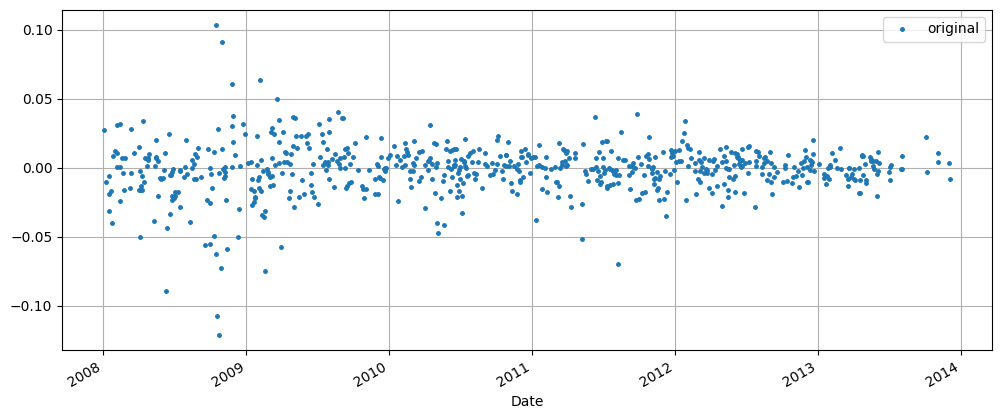

In [70]:
df[' Price'].plot(label="original", **plotconfig, legend=True)

In [72]:
pivot_df = df.pivot_table(values=' Price', columns='Year', index=df.index)

In [76]:
print(pivot_df)

Year            2008  2009  2010  2011  2012      2013
Date                                                  
2008-01-04  0.027051   NaN   NaN   NaN   NaN       NaN
2008-01-08 -0.010284   NaN   NaN   NaN   NaN       NaN
2008-01-15 -0.018769   NaN   NaN   NaN   NaN       NaN
2008-01-16 -0.031088   NaN   NaN   NaN   NaN       NaN
2008-01-17 -0.005938   NaN   NaN   NaN   NaN       NaN
...              ...   ...   ...   ...   ...       ...
2013-10-05       NaN   NaN   NaN   NaN   NaN -0.003226
2013-11-02       NaN   NaN   NaN   NaN   NaN  0.004242
2013-11-04       NaN   NaN   NaN   NaN   NaN  0.010706
2013-12-02       NaN   NaN   NaN   NaN   NaN  0.003267
2013-12-03       NaN   NaN   NaN   NaN   NaN -0.008350

[680 rows x 6 columns]


<Axes: xlabel='Date'>

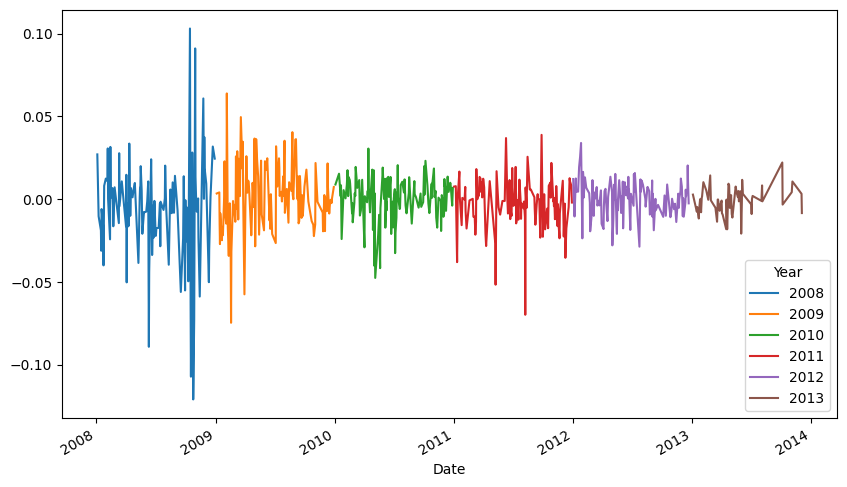

In [73]:
plt.figure(figsize=(10, 6))

# Plot the prices for each year
pivot_df.plot(ax=plt.gca(), legend=True)

8. Show the log-return distribution of the companies (ideally in the same plot)

array([[<Axes: title={'center': '2008'}>,
        <Axes: title={'center': '2009'}>],
       [<Axes: title={'center': '2010'}>,
        <Axes: title={'center': '2011'}>],
       [<Axes: title={'center': '2012'}>,
        <Axes: title={'center': '2013'}>]], dtype=object)

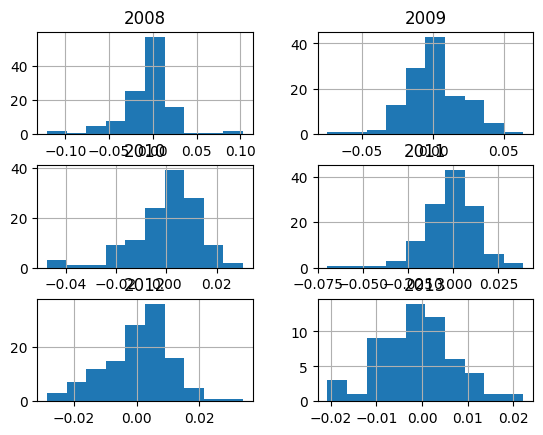

In [77]:
pivot_df.hist()

In [ ]:
2008 = df.loc[df.['Year']]
covid.loc[covid['iso_code'].isin(['SVK','CZE'])] 

import pandas as pd

merged_df = pd.merge(df1, df2, how='type_of_join', on='common_column')

Key Parameters:

- df1: The first DataFrame.
- df2: The second DataFrame.
- how: Specifies the type of join. Common options are:
- 'inner': Returns only the rows with keys that appear in both DataFrames (default).
- 'left': All rows from the left DataFrame and matching rows from the right DataFrame.
- 'right': All rows from the right DataFrame and matching rows from the left DataFrame.
- 'outer': All rows from both DataFrames, filling with NaN for missing values.
- on: The column or index on which to merge the DataFrames. If not specified, it will try to merge on columns with the same name.